# BALCO_Tensile Strength_Conductivity as Input

In [27]:
#Import dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression

In [3]:
# Loading the data
# connecting data into pandas
RUL_database = pd.read_csv(r"C:\Users\rishi\OneDrive\Desktop\INTERNSHIPs\RISHI -ML Intern-BALCO\T4 ALLOY PROJECT\WireRodData.csv")

In [4]:
# showing random 10 rows from the dataset
RUL_database.sample(10)

,EventFrame,StartTime,EndTime,ShiftDate,Duration,Reel Name,T4 Coil Number,ReelWeight,Is Scrap,Shift,...,CreatedOn,UpdatedBy,UpdatedOn,IsRejected,RejectedBy,RejectedOn,Rej_UpdatedBy,Rej_UpdatedOn,Rej_Remark,Id
419,CH1_WRM_COILGEN_EF_ReelA_28-05-2023 21:05:25,05:25.2,54:21.8,5/28/2023,48:57.0,ReelA,NaN,682.060974,0.0,B,...,NaN,13645.0,01:10.9,NaN,NaN,NaN,NaN,NaN,NaN,1259
773,CH1_WRM_COILGEN_EF_ReelB_10-05-2023 19:34:00,34:00.2,22:09.6,5/10/2023,48:09.0,ReelB,J078320001,6.343295,0.0,B,...,NaN,1577444.0,45:32.3,NaN,NaN,NaN,NaN,NaN,NaN,964
726,CH1_WRM_COILGEN_EF_ReelB_12-05-2023 13:05:13,05:13.3,57:33.9,5/12/2023,52:21.0,ReelB,NaN,2150.050293,0.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,989
1465,CH1_WRM_COILGEN_EF_ReelA_07-04-2023 01:21:27,21:27.9,23:16.9,4/6/2023,01:49.0,ReelA,NaN,0.000000,0.0,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,257
271,CH1_WRM_COILGEN_EF_ReelA_06-06-2023 09:26:00,26:00.7,28:25.2,6/6/2023,02:24.0,ReelA,H076950004,2150.050537,0.0,A,...,NaN,1577444.0,55:45.4,NaN,NaN,NaN,NaN,NaN,NaN,1422
838,CH1_WRM_COILGEN_EF_ReelB_07-05-2023 06:14:17,14:17.9,25:52.1,5/7/2023,11:34.0,ReelB,NaN,1098.767700,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,849
677,CH1_WRM_COILGEN_EF_ReelA_14-05-2023 15:55:47,55:47.6,59:22.6,5/14/2023,03:35.0,ReelA,NaN,4.636731,1.0,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1020
116,CH1_WRM_COILGEN_EF_ReelA_13-06-2023 13:35:24,35:24.6,39:18.7,6/13/2023,03:54.0,ReelA,NaN,3.287926,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1576
790,CH1_WRM_COILGEN_EF_ReelB_09-05-2023 05:34:27,34:27.7,35:50.3,5/8/2023,01:23.0,ReelB,J078300005,2150.031494,0.0,C,...,NaN,1565121.0,53:23.5,NaN,NaN,NaN,NaN,NaN,NaN,909
1442,CH1_WRM_COILGEN_EF_ReelB_08-04-2023 01:16:13,16:13.8,17:18.8,4/7/2023,01:05.0,ReelB,NaN,0.000000,1.0,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370


In [5]:
# No. of rows and columns
RUL_database.shape

(1693, 72)

In [6]:
RUL_database.describe()

,ReelWeight,Is Scrap,Cast Bar Temperature,Cast Bar Temperature LSL,Cast Bar Temperature USL,Casting Water Temperature,Casting Water Temp LSL,Casting Water Temp USL,Emulsion Temperature,Emulsion temperature LSL,...,CreatedBy,CreatedOn,UpdatedBy,IsRejected,RejectedBy,RejectedOn,Rej_UpdatedBy,Rej_UpdatedOn,Rej_Remark,Id
count,1693.000000,1690.000000,1692.000000,1693.000000,1693.000000,1692.000000,1693.000000,1693.000000,1693.000000,1693.000000,...,0.0,0.0,9.300000e+02,0.0,0.0,0.0,0.0,0.0,0.0,1693.000000
mean,1141.763854,0.218343,458.620273,429.836891,515.779923,316.692638,255.297933,295.129583,60.757636,53.771944,...,NaN,NaN,1.443318e+06,NaN,NaN,NaN,NaN,NaN,NaN,847.000000
std,1035.286750,0.413244,115.579974,114.448729,28.124151,21.082818,102.815293,116.609464,8.260609,8.936559,...,NaN,NaN,4.388543e+05,NaN,NaN,NaN,NaN,NaN,NaN,488.871319
min,0.000000,0.000000,100.000000,99.000000,480.000000,0.000000,28.000000,36.000000,33.182003,30.000000,...,NaN,NaN,1.364500e+04,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,0.000000,0.000000,443.951942,420.000000,480.000000,318.463013,300.000000,330.000000,56.104886,50.000000,...,NaN,NaN,1.577418e+06,NaN,NaN,NaN,NaN,NaN,NaN,424.000000
50%,1410.391479,0.000000,515.669678,420.000000,540.000000,318.463013,300.000000,350.000000,61.242344,60.000000,...,NaN,NaN,1.577444e+06,NaN,NaN,NaN,NaN,NaN,NaN,847.000000
75%,2184.786621,0.000000,529.882477,510.000000,540.000000,318.463013,300.000000,350.000000,66.262535,60.000000,...,NaN,NaN,1.577444e+06,NaN,NaN,NaN,NaN,NaN,NaN,1270.000000
max,2623.041748,1.000000,563.682922,510.000000,540.000000,318.463013,315.000000,350.000000,81.116410,60.000000,...,NaN,NaN,1.582919e+06,NaN,NaN,NaN,NaN,NaN,NaN,1693.000000


In [7]:
# No. of cells having NULL values
RUL_database['UTS_KG'].isnull().sum()

866

In [8]:
# Average Tensile Strength
RUL_database['UTS_KG'].mean()

17.25229746070133

In [9]:
# No. of unique values of tensile strength in dataset
RUL_database['UTS_KG'].value_counts().shape

(343,)

In [10]:
RUL_database['UTS_KG'] = RUL_database['UTS_KG'].replace(np.NaN, RUL_database['UTS_KG'].mean())
RUL_database['Conductivity'] = RUL_database['Conductivity'].replace(np.NaN, RUL_database['Conductivity'].mean())
print(RUL_database['UTS_KG'])
print(RUL_database['Conductivity'])

0       17.252297
1       17.252297
2       17.252297
3       17.252297
4       17.252297
          ...    
1688    17.252297
1689    17.252297
1690    17.252297
1691    17.252297
1692    17.252297
Name: UTS_KG, Length: 1693, dtype: float64
0       52.680351
1       52.680351
2       52.680351
3       52.680351
4       52.680351
          ...    
1688    52.680351
1689    52.680351
1690    52.680351
1691    52.680351
1692    52.680351
Name: Conductivity, Length: 1693, dtype: float64


In [11]:
# Dropping columns with all null values
RUL_database = RUL_database.dropna(axis=1, how='all')
print(RUL_database)

                                        EventFrame StartTime  EndTime  \
0     CH1_WRM_COILGEN_EF_ReelB_20-06-2023 17:23:28   23:28.6  26:35.7   
1     CH1_WRM_COILGEN_EF_ReelA_20-06-2023 16:24:17   24:17.9  24:01.6   
2     CH1_WRM_COILGEN_EF_ReelA_20-06-2023 16:21:26   21:26.8  23:06.9   
3     CH1_WRM_COILGEN_EF_ReelB_20-06-2023 15:50:14   50:14.3  21:24.8   
4     CH1_WRM_COILGEN_EF_ReelA_20-06-2023 10:59:25   59:25.6  02:04.8   
...                                            ...       ...      ...   
1688  CH1_WRM_COILGEN_EF_ReelB_28-03-2023 00:30:09   30:09.9  33:20.1   
1689  CH1_WRM_COILGEN_EF_ReelA_27-03-2023 23:31:31   31:31.9  33:23.1   
1690  CH1_WRM_COILGEN_EF_ReelA_27-03-2023 20:58:10   58:10.4  36:43.0   
1691  CH1_WRM_COILGEN_EF_ReelA_27-03-2023 17:56:57   56:57.3  57:09.3   
1692  CH1_WRM_COILGEN_EF_ReelB_27-03-2023 16:57:18   57:18.4  00:15.4   

      ShiftDate Duration Reel Name T4 Coil Number   ReelWeight  Is Scrap  \
0     6/20/2023  03:07.0     ReelB            N

In [12]:
# Replacing other null values with zeroes
RUL_database = RUL_database.replace(np.nan,0)
print(RUL_database)

                                        EventFrame StartTime  EndTime  \
0     CH1_WRM_COILGEN_EF_ReelB_20-06-2023 17:23:28   23:28.6  26:35.7   
1     CH1_WRM_COILGEN_EF_ReelA_20-06-2023 16:24:17   24:17.9  24:01.6   
2     CH1_WRM_COILGEN_EF_ReelA_20-06-2023 16:21:26   21:26.8  23:06.9   
3     CH1_WRM_COILGEN_EF_ReelB_20-06-2023 15:50:14   50:14.3  21:24.8   
4     CH1_WRM_COILGEN_EF_ReelA_20-06-2023 10:59:25   59:25.6  02:04.8   
...                                            ...       ...      ...   
1688  CH1_WRM_COILGEN_EF_ReelB_28-03-2023 00:30:09   30:09.9  33:20.1   
1689  CH1_WRM_COILGEN_EF_ReelA_27-03-2023 23:31:31   31:31.9  33:23.1   
1690  CH1_WRM_COILGEN_EF_ReelA_27-03-2023 20:58:10   58:10.4  36:43.0   
1691  CH1_WRM_COILGEN_EF_ReelA_27-03-2023 17:56:57   56:57.3  57:09.3   
1692  CH1_WRM_COILGEN_EF_ReelB_27-03-2023 16:57:18   57:18.4  00:15.4   

      ShiftDate Duration Reel Name T4 Coil Number   ReelWeight  Is Scrap  \
0     6/20/2023  03:07.0     ReelB             

In [13]:
X = RUL_database.drop(columns = {'EventFrame','StartTime','EndTime','ShiftDate','Duration','Casting Water Flow LSL','Reel Name','T4 Coil Number','ReelWeight','Is Scrap','Shift','Cast Bar Temperature LSL','Cast Bar Temperature USL','Casting Water Temp LSL','Casting Water Temp USL','Emulsion temperature LSL','Emulsion temperature USL','RAC Water Temperature LSL','RAC Water Temperature USL','Tibor Rod Speed','Tibor Rod Speed LSL','Tibor Rod Speed USL','Casting Water Flow USL','Emulsion Pressure Flow LSL','Emulsion Pressure Flow USL','Gear Oil Pressure LSL','Gear Oil Pressure USL','Gear Oil Temperature LSL','Gear Oil Temperature USL','Casting Pressure LSL','Casting Pressure USL','RAC Pressure LSL','RAC Pressure USL','Tundish Temperature LSL','Tundish Temperature USL','Fe','Si','Ti4','V3','Mg','Cu','Purity','UTS_mpa','EL','UpdatedBy','UpdatedOn','Id','Cast Bar Temperature','Casting Water Temperature','Emulsion Temperature','RAC Water Temperature','Casting Water Flow','Emulsion Pressure Flow','Gear Oil Pressure', 'Gear Oil Temperature', 'Casting Pressure', 'RAC Pressure','Tundish Temperature'}, axis = 1)
Y = RUL_database.drop(columns = {'EventFrame','StartTime','EndTime','ShiftDate','Duration','Casting Water Flow LSL','Reel Name','T4 Coil Number','ReelWeight','Is Scrap','Shift','Cast Bar Temperature LSL','Cast Bar Temperature USL','Casting Water Temp LSL','Casting Water Temp USL','Emulsion temperature LSL','Emulsion temperature USL','RAC Water Temperature LSL','RAC Water Temperature USL','Tibor Rod Speed','Tibor Rod Speed LSL','Tibor Rod Speed USL','Casting Water Flow USL','Emulsion Pressure Flow LSL','Emulsion Pressure Flow USL','Gear Oil Pressure LSL','Gear Oil Pressure USL','Gear Oil Temperature LSL','Gear Oil Temperature USL','Casting Pressure LSL','Casting Pressure USL','RAC Pressure LSL','RAC Pressure USL','Tundish Temperature LSL','Tundish Temperature USL','UTS_KG','UTS_mpa','EL','UpdatedBy','UpdatedOn','Id','UTS_KG','Conductivity'}, axis = 1)

In [14]:
print(X)

         UTS_KG  Conductivity
0     17.252297     52.680351
1     17.252297     52.680351
2     17.252297     52.680351
3     17.252297     52.680351
4     17.252297     52.680351
...         ...           ...
1688  17.252297     52.680351
1689  17.252297     52.680351
1690  17.252297     52.680351
1691  17.252297     52.680351
1692  17.252297     52.680351

[1693 rows x 2 columns]


In [15]:
print(Y)

      Cast Bar Temperature  Casting Water Temperature  Emulsion Temperature  \
0               459.458862                 318.463013             68.357821   
1               538.750122                 318.463013             64.416104   
2               540.147461                 318.463013             59.158772   
3               538.151428                 318.463013             55.188634   
4               388.457520                 318.463013             55.268714   
...                    ...                        ...                   ...   
1688            510.923492                 318.463013             61.346301   
1689            506.927582                 318.462738             59.666017   
1690            147.644714                 318.463013             54.899743   
1691            126.106476                 318.462555             44.080236   
1692            525.645935                 318.462250             63.427145   

      RAC Water Temperature  Casting Water Flow  Em

In [31]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)

In [32]:
X = standardized_data
Y = RUL_database.drop(columns = {'EventFrame','StartTime','EndTime','ShiftDate','Duration','Casting Water Flow LSL','Reel Name','T4 Coil Number','ReelWeight','Is Scrap','Shift','Cast Bar Temperature LSL','Cast Bar Temperature USL','Casting Water Temp LSL','Casting Water Temp USL','Emulsion temperature LSL','Emulsion temperature USL','RAC Water Temperature LSL','RAC Water Temperature USL','Tibor Rod Speed','Tibor Rod Speed LSL','Tibor Rod Speed USL','Casting Water Flow USL','Emulsion Pressure Flow LSL','Emulsion Pressure Flow USL','Gear Oil Pressure LSL','Gear Oil Pressure USL','Gear Oil Temperature LSL','Gear Oil Temperature USL','Casting Pressure LSL','Casting Pressure USL','RAC Pressure LSL','RAC Pressure USL','Tundish Temperature LSL','Tundish Temperature USL','UTS_KG','UTS_mpa','EL','UpdatedBy','UpdatedOn','Id','UTS_KG','Conductivity'}, axis = 1)

In [408]:
print(X)

[[-8.05445170e-15 -2.47674973e-14]
 [-8.05445170e-15 -2.47674973e-14]
 [-8.05445170e-15 -2.47674973e-14]
 ...
 [-8.05445170e-15 -2.47674973e-14]
 [-8.05445170e-15 -2.47674973e-14]
 [-8.05445170e-15 -2.47674973e-14]]


In [409]:
print(Y)

      Cast Bar Temperature  Casting Water Temperature  Emulsion Temperature  \
0               459.458862                 318.463013             68.357821   
1               538.750122                 318.463013             64.416104   
2               540.147461                 318.463013             59.158772   
3               538.151428                 318.463013             55.188634   
4               388.457520                 318.463013             55.268714   
...                    ...                        ...                   ...   
1688            510.923492                 318.463013             61.346301   
1689            506.927582                 318.462738             59.666017   
1690            147.644714                 318.463013             54.899743   
1691            126.106476                 318.462555             44.080236   
1692            525.645935                 318.462250             63.427145   

      RAC Water Temperature  Casting Water Flow  Em

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=2)

In [19]:
# Size of training and testing data
print(X.shape, X_train.shape, X_test.shape)

(1693, 2) (1354, 2) (339, 2)


In [20]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

In [21]:
model.fit(X_train, Y_train)
model = MultiOutputRegressor(GradientBoostingRegressor())##ml model

In [22]:
# Fit the model on the training data
model.fit(X_train, Y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor())

In [23]:
Y_train_prediction = model.predict(X_train)

In [24]:
# ## Training the model

# ## Model evaluation

# In[1910]:


train_mse = mean_squared_error(Y_train, Y_train_prediction, multioutput='raw_values')
train_r2 = r2_score(Y_train, Y_train_prediction, multioutput='raw_values')

print("Training set MSE for each target variable:", train_mse)
print("\nTraining set R2 score for each target variable:", train_r2)

# Predict on the test data
Y_test_prediction = model.predict(X_test)

# Calculate the test set scores
test_mse = mean_squared_error(Y_test, Y_test_prediction, multioutput='raw_values')
test_r2 = r2_score(Y_test, Y_test_prediction, multioutput='raw_values')

print("\nTest set MSE for each target variable:", test_mse)
print("\nTest set R2 score for each target variable:", test_r2)

Training set MSE for each target variable: [1.09427330e+04 2.61508713e+02 5.30610958e+01 5.24172183e-02
 1.69350239e+02 2.78472111e-01 2.73291864e-01 7.65919270e+00
 1.60253595e+03 6.20264964e-01 7.15916102e+04 2.88672263e-04
 1.81482564e-03 3.08229652e-06 6.06385743e-07 2.90641150e-03
 6.84672406e-09 3.61059084e+01]

Training set R2 score for each target variable: [2.14812261e-01 4.55014097e-01 2.22007300e-01 7.00814071e-04
 8.95046122e-02 1.89467126e-01 1.85391310e-01 2.47638098e-01
 3.13774097e-01 1.36725157e-01 2.79636435e-01 9.72726007e-01
 9.76254036e-01 8.28764353e-01 9.82757340e-01 9.72535303e-01
 9.77354191e-01 9.85319258e-01]

Test set MSE for each target variable: [1.01219188e+04 8.98946574e+02 6.40332279e+01 7.42221520e-05
 1.15278275e+02 2.00893968e-01 3.17162073e-01 9.36035253e+00
 1.82573266e+03 7.22040253e-01 7.42021029e+04 2.93508351e-04
 1.41982851e-03 4.35906482e-06 2.76384760e-07 3.14399576e-03
 7.90765904e-09 2.60548670e-01]

Test set R2 score for each target varia

In [28]:

X, Y = make_regression(n_samples=1695, n_features=1, n_informative=5, n_targets=18,random_state=1, noise=0.5)
row = [[18,51.4]]  # Ensure row is a 2-dimensional array with one element
row_scaled = scaler.transform(row)
prediction = model.predict(row_scaled)

# Summarize the prediction
prediction_list = list(prediction)

C:\Users\rishi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [29]:
# Print the predicted values
for row in prediction_list:
    print("\nCast Bar Temperature:", row[0])
    print("Casting Water Temperature:", row[1])
    print("Emulsion Temperature:", row[2])
    print("RAC Water Temperature:", row[3])
    print("Casting Water Flow:", row[4])
    print("Emulsion Pressure Flow:", row[5])
    print("Gear Oil Pressure:", row[6])
    print("Gear Oil Temperature:", row[7])
    print("Casting Pressure:", row[8])
    print("RAC Pressure:", row[9])
    print("Tundish Temperature:", row[10])
    print("Fe:", row[11])
    print("Si:", row[12])
    print("Ti4:", row[13])
    print("V3:", row[14])
    print("Mg:", row[15])
    print("Cu:", row[16])
    print("Purity:", row[17])


Cast Bar Temperature: 523.1647615041511
Casting Water Temperature: 318.4278718519152
Emulsion Temperature: 63.4533489884507
RAC Water Temperature: 8.430609537680807
Casting Water Flow: 59.47753934047449
Emulsion Pressure Flow: 3.1985059019051736
Gear Oil Pressure: 1.699403101397153
Gear Oil Temperature: 40.543967614387284
Casting Pressure: 1.7530125653495907
RAC Pressure: 2.0703455482068067
Tundish Temperature: 677.6791301398283
Fe: 0.1986057400389009
Si: 0.5268580103330656
Ti4: 0.006759956703272199
V3: 0.011773419766924703
Mg: 0.6375044953732307
Cu: 0.0010700136186056267
Purity: 99.22485523874869


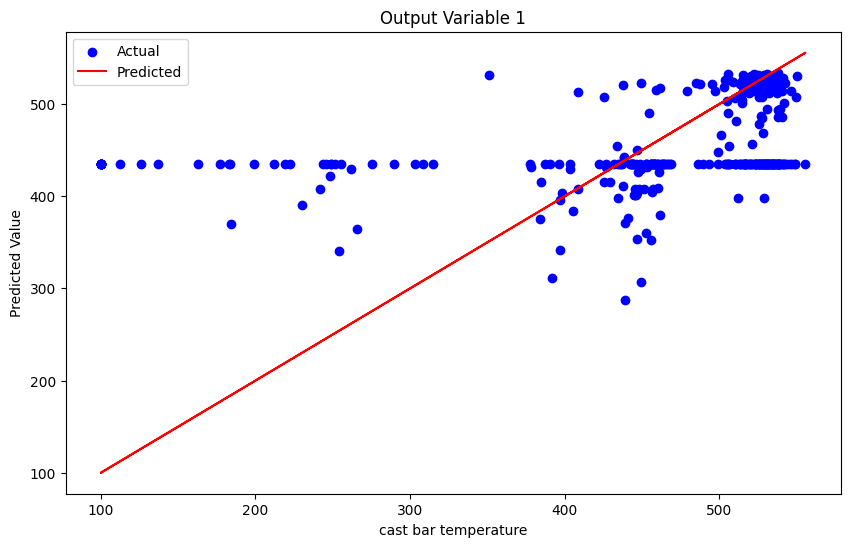

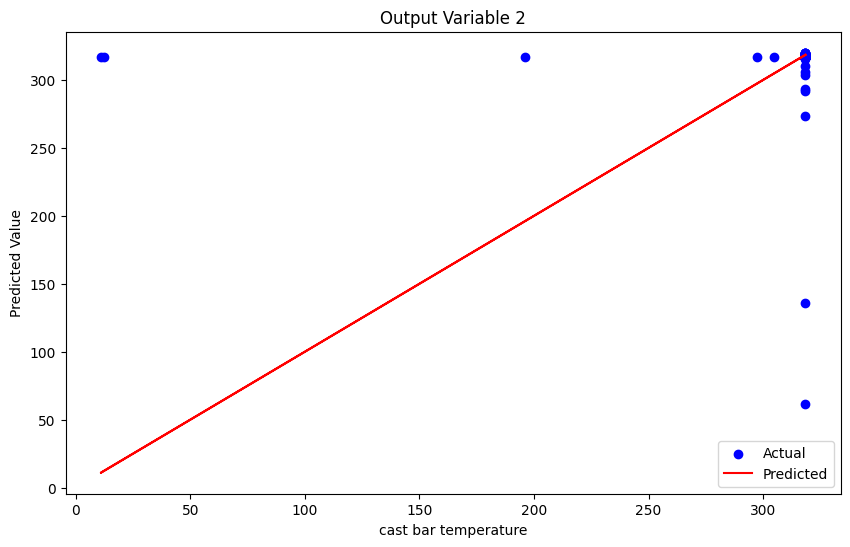

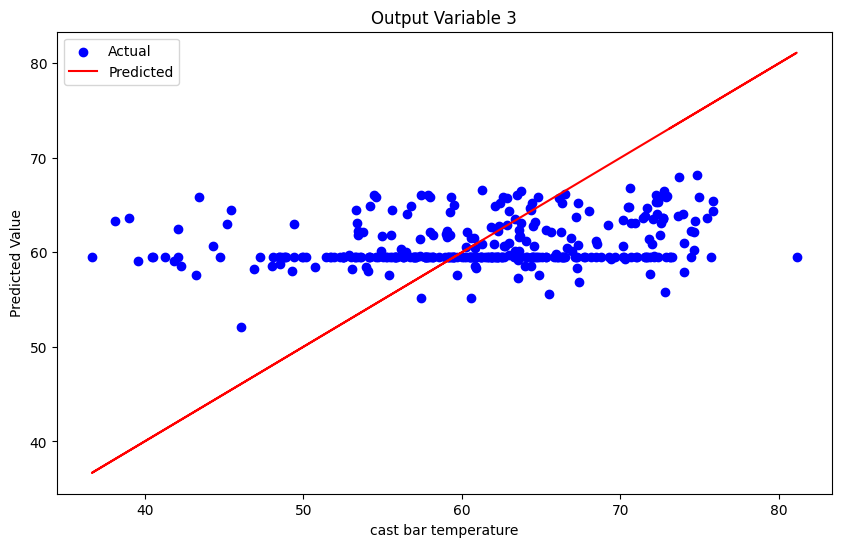

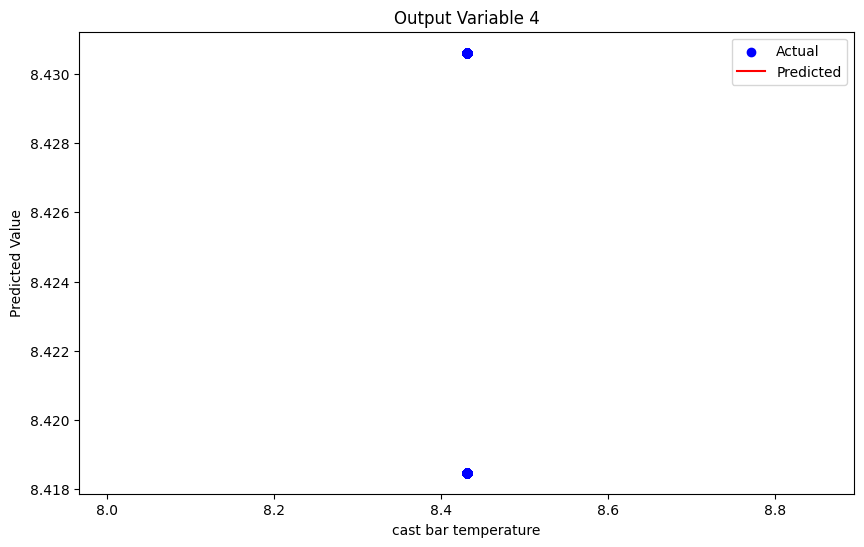

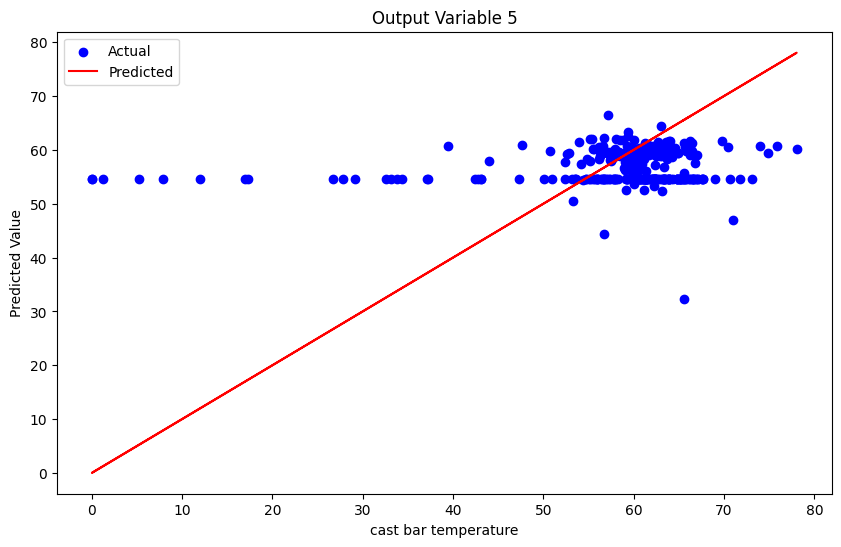

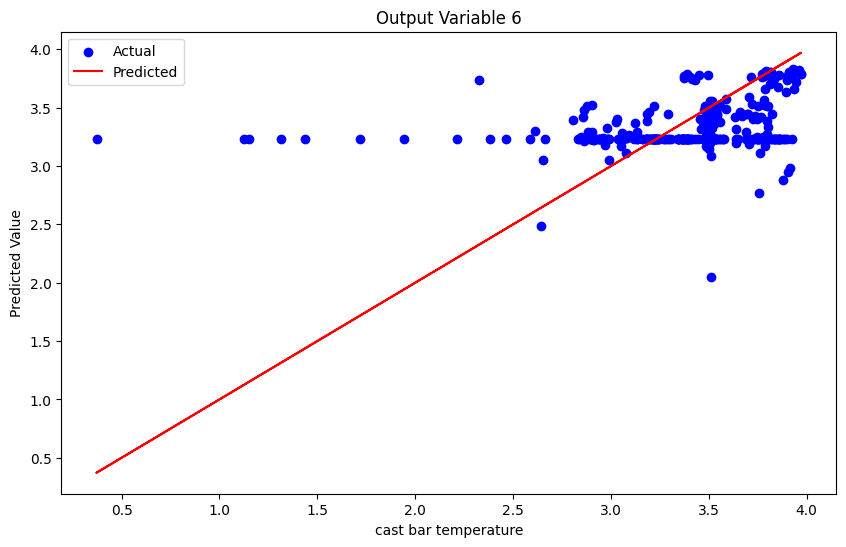

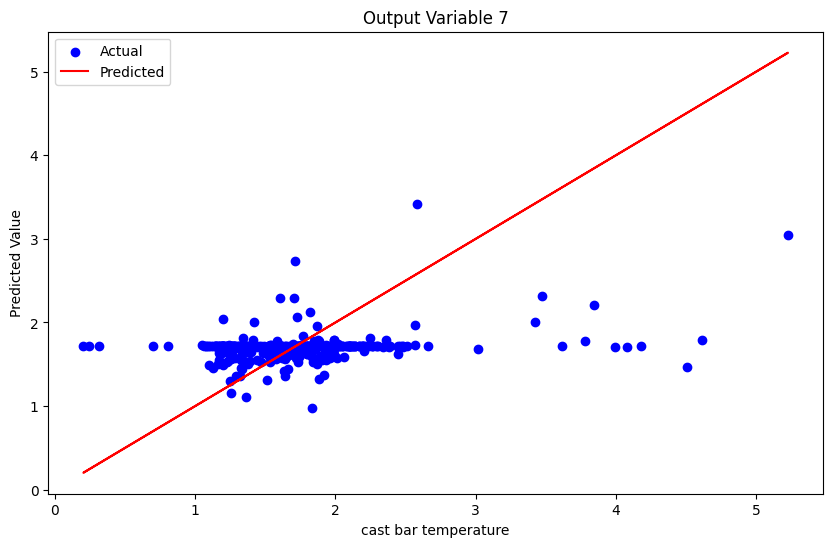

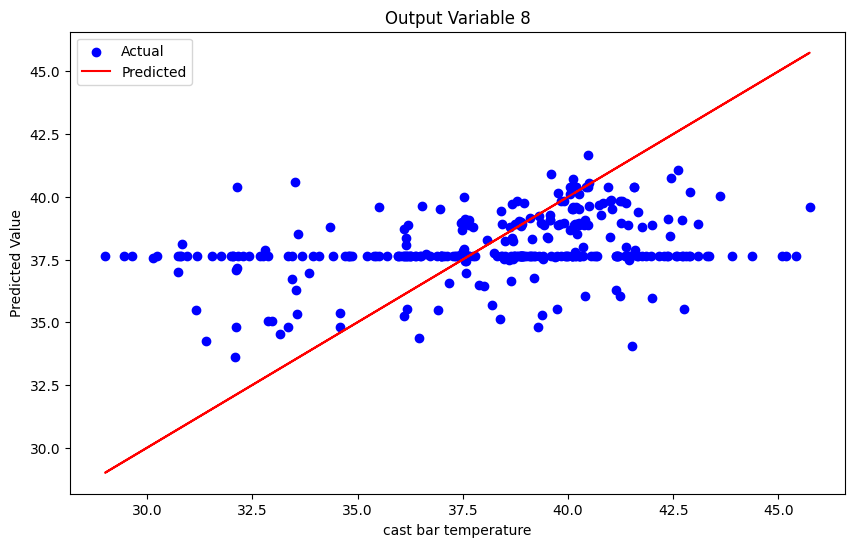

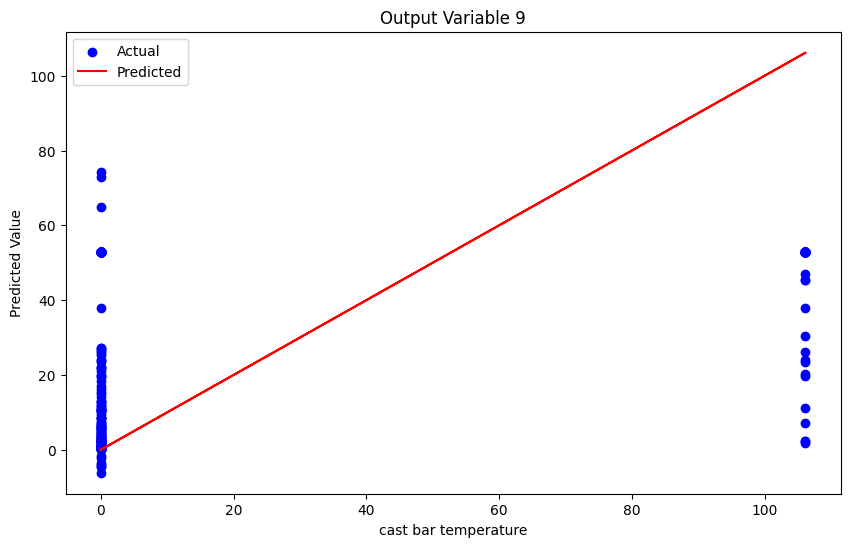

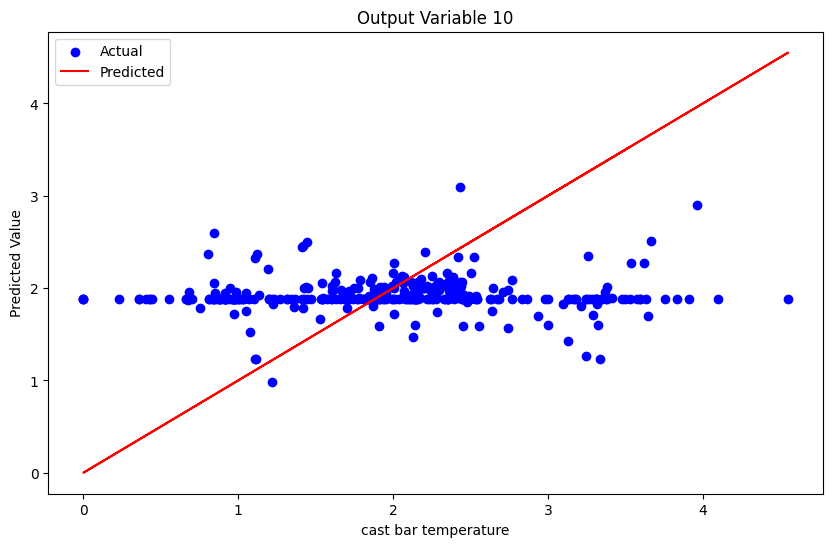

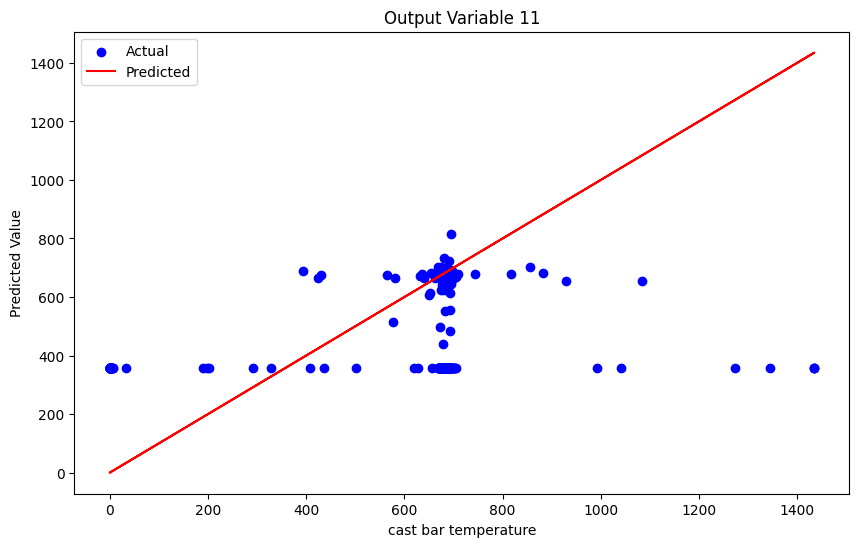

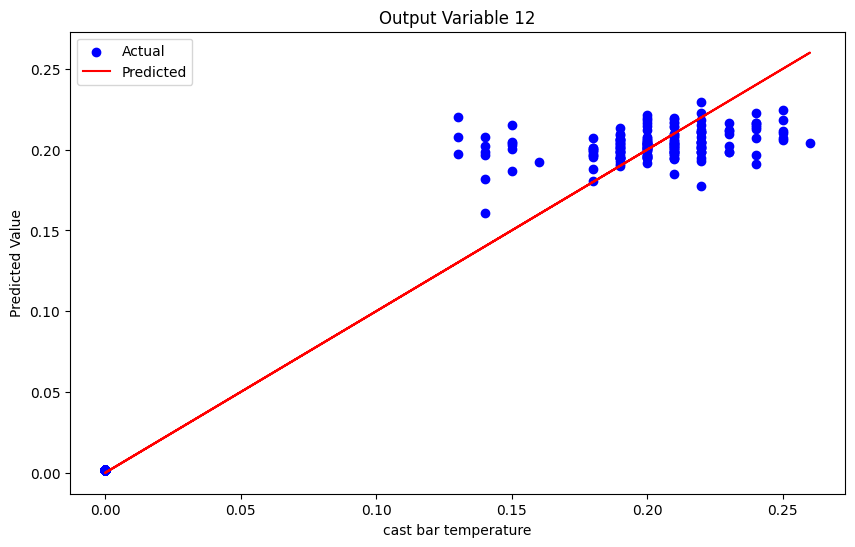

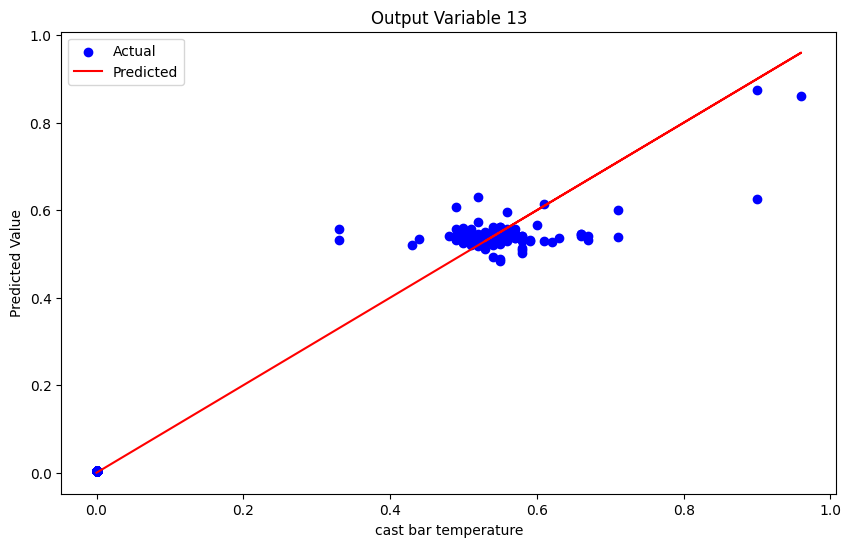

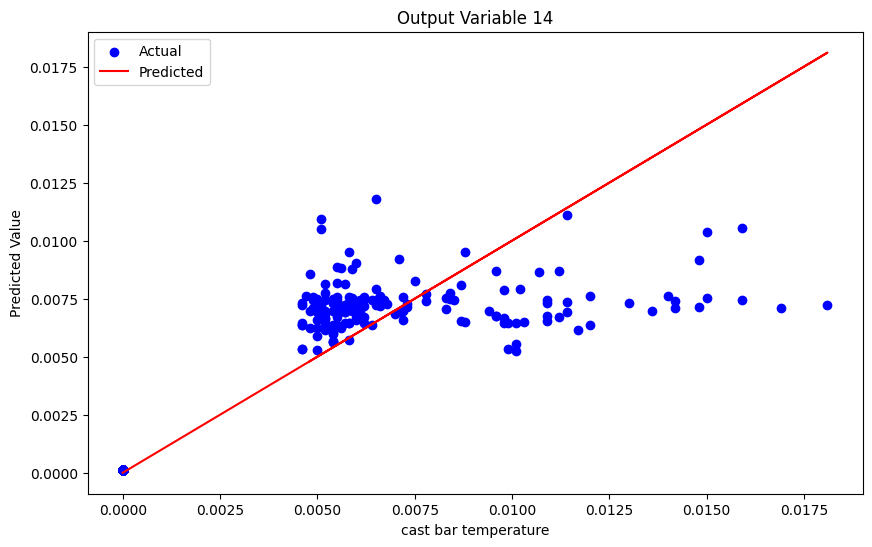

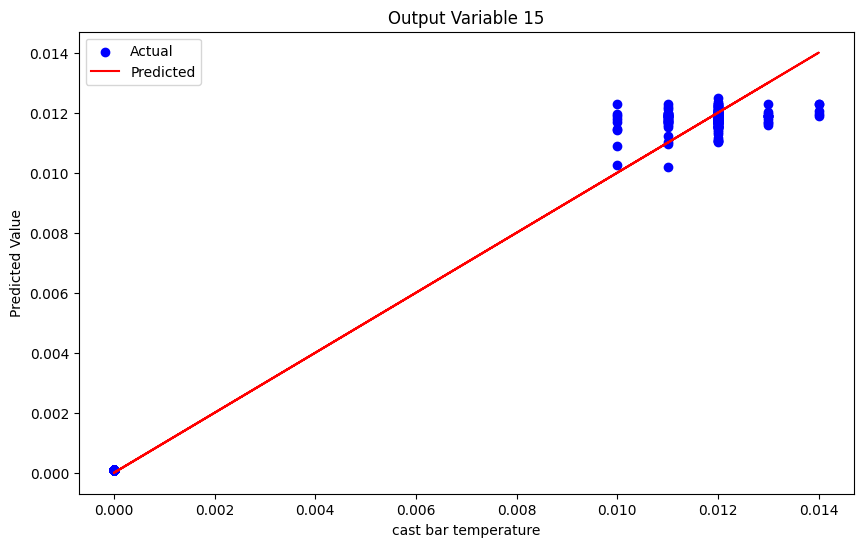

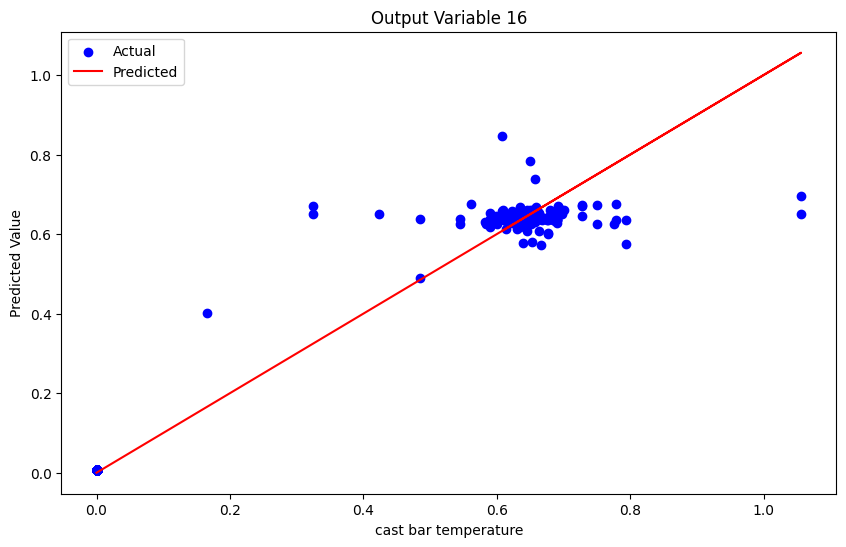

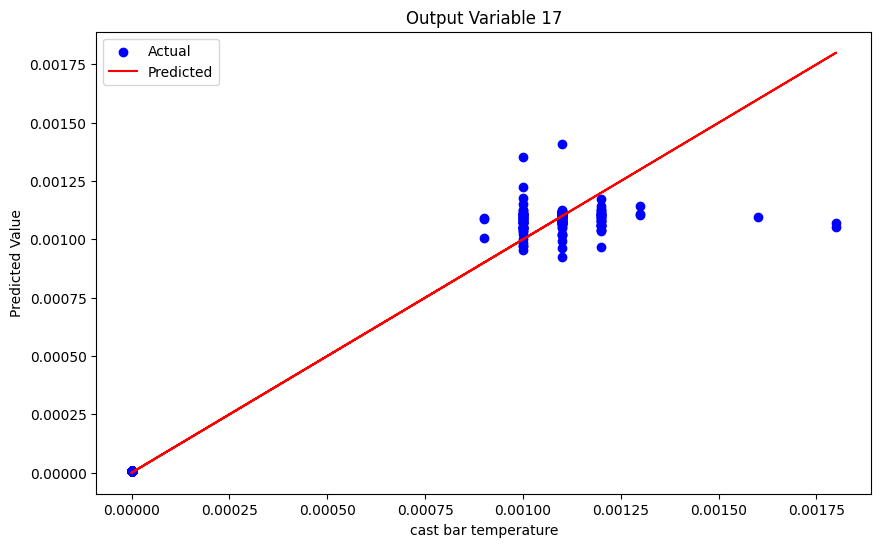

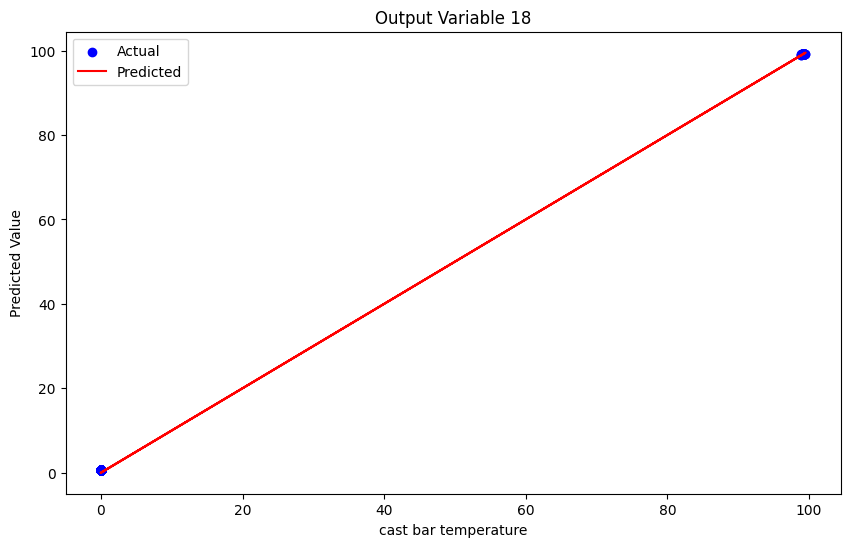

In [30]:
import matplotlib.pyplot as plt

# Plotting the graphs for each output variable
num_outputs = Y_test.shape[1]  # Number of output variables

for i in range(num_outputs):
    plt.figure(figsize=(10, 6))
    plt.scatter(Y_test.iloc[:, i], Y_test_prediction[:, i], c='blue', label='Actual')
    plt.plot(Y_test.iloc[:, i], Y_test.iloc[:, i], c='red', label='Predicted')
    plt.xlabel('cast bar temperature')
    plt.ylabel('Predicted Value')
    plt.title(f'Output Variable {i+1}')
    plt.legend()
    plt.show()